In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-15.8,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-16.7,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.5,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-17.0,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1,0
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2,0
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7,0
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,0
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-16.745136
1,-79,-16.755505
2,-78,-16.784532
3,-77,-16.759091
4,-76,-16.752614
...,...,...
94,14,-16.782698
95,15,-16.762151
96,16,-16.753623
97,17,-16.738455


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-16.733008,150
1,-79,-16.735115,151
2,-78,-16.724037,152
3,-77,-16.702706,153
4,-76,-16.754482,154
...,...,...,...
94,14,-16.713252,244
95,15,-16.734897,245
96,16,-16.715713,246
97,17,-16.702815,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


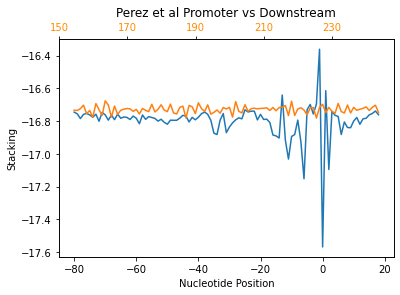

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Perez et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
29334,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
29335,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
29336,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8391274710293115, Precision: 0.8876146788990825, Recall: 0.7812920592193809, F1 Score: 0.8310665712240516, MCC: 0.6837436032481748, Specificity: 0.8984806629834254
Fold 2: Accuracy: 0.8316291751874574, Precision: 0.8834796488427773, Recall: 0.7608247422680412, F1 Score: 0.8175775480059084, MCC: 0.6692462419810267, Specificity: 0.9012846517917512
Fold 3: Accuracy: 0.8517382413087935, Precision: 0.8850488354620586, Recall: 0.8068493150684931, F1 Score: 0.8441418846291651, MCC: 0.7060828663241538, Specificity: 0.8962008141112618
Fold 4: Accuracy: 0.8302658486707567, Precision: 0.8858654572940288, Recall: 0.771560236998025, F1 Score: 0.824771287825475, MCC: 0.6676529506474479, Specificity: 0.893286219081272
Fold 5: Accuracy: 0.8415132924335378, Precision: 0.8880597014925373, Recall: 0.7906976744186046, F1 Score: 0.8365553602811951, MCC: 0.68808236540813, Specificity: 0.8950314905528342
Fold 6: Accuracy: 0.8425357873210634, Precision: 0.8777089783281734, Recall: 0.788595

In [30]:
accuracy_list

[0.8391274710293115,
 0.8316291751874574,
 0.8517382413087935,
 0.8302658486707567,
 0.8415132924335378,
 0.8425357873210634,
 0.8353783231083844,
 0.8404907975460123,
 0.836345039209001,
 0.8407773610637572]

In [31]:
precision_list

[0.8876146788990825,
 0.8834796488427773,
 0.8850488354620586,
 0.8858654572940288,
 0.8880597014925373,
 0.8777089783281734,
 0.8811881188118812,
 0.8750969743987588,
 0.8774548311076198,
 0.8666666666666667]

In [32]:
recall_list

[0.7812920592193809,
 0.7608247422680412,
 0.8068493150684931,
 0.771560236998025,
 0.7906976744186046,
 0.7885952712100139,
 0.7796495956873315,
 0.7860627177700349,
 0.7751561415683553,
 0.8001383125864454]

In [33]:
specificity_list

[0.8984806629834254,
 0.9012846517917512,
 0.8962008141112618,
 0.893286219081272,
 0.8950314905528342,
 0.8943850267379679,
 0.8924137931034483,
 0.8925950633755837,
 0.8954423592493298,
 0.8802958977807667]

In [34]:
f1_score_list 

[0.8310665712240516,
 0.8175775480059084,
 0.8441418846291651,
 0.824771287825475,
 0.8365553602811951,
 0.8307692307692308,
 0.8273149803360744,
 0.8281938325991189,
 0.8231392778187178,
 0.8320747932398419]

In [35]:
mcc_list

[0.6837436032481748,
 0.6692462419810267,
 0.7060828663241538,
 0.6676529506474479,
 0.68808236540813,
 0.6877578914522224,
 0.6757519671296144,
 0.6835466984634638,
 0.6764111132413545,
 0.6831196075167404]

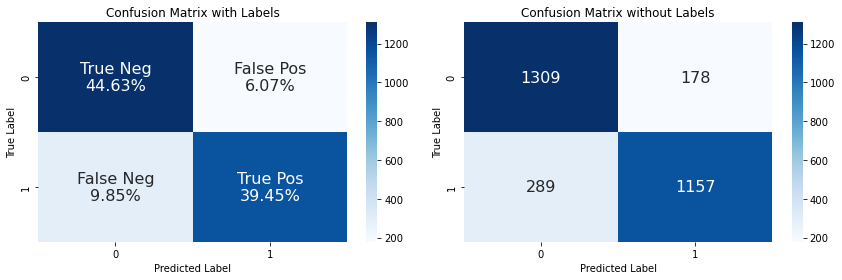

In [36]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
print(mean(accuracy_list))

0.8389801336878075


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


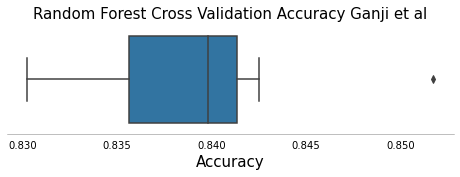

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00452743, 0.00430914, 0.00480118, 0.00487871, 0.00411731,
       0.00399974, 0.00415615, 0.00431152, 0.00455275, 0.00467475,
       0.00424095, 0.00476259, 0.00427759, 0.00459588, 0.00419677,
       0.00426654, 0.0045012 , 0.00476528, 0.00449573, 0.00426809,
       0.00434733, 0.00424021, 0.00421165, 0.0046003 , 0.00396048,
       0.00428598, 0.00437242, 0.00493888, 0.00483525, 0.00444716,
       0.0043703 , 0.00431772, 0.0042933 , 0.00395706, 0.00431012,
       0.00452975, 0.00426809, 0.00417005, 0.00479281, 0.00418804,
       0.0041288 , 0.00387043, 0.00414822, 0.00457085, 0.00464583,
       0.00508902, 0.00432645, 0.00461304, 0.00463905, 0.00480099,
       0.00526117, 0.00436074, 0.00430066, 0.00448834, 0.00450711,
       0.00432953, 0.00428415, 0.00442455, 0.00412303, 0.00423703,
       0.00451757, 0.004599  , 0.005144  , 0.00500058, 0.00447366,
       0.00635798, 0.00840192, 0.00864846, 0.05617851, 0.23512846,
       0.05280383, 0.01730215, 0.04539719, 0.04479126, 0.01289

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

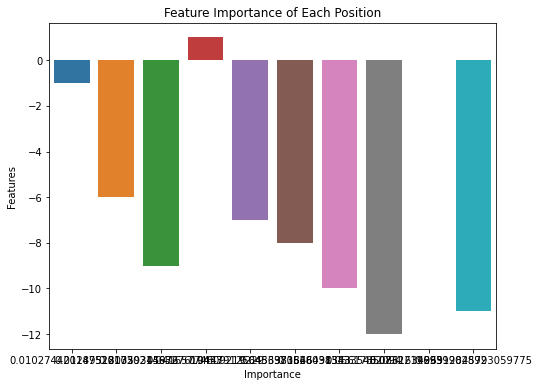

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004527,-80
1,1,0.004309,-79
2,2,0.004801,-78
3,3,0.004879,-77
4,4,0.004117,-76
...,...,...,...
94,94,0.004369,14
95,95,0.004268,15
96,96,0.004507,16
97,97,0.004414,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

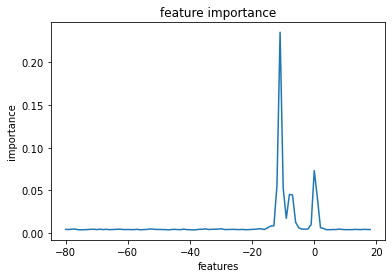

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8407773610637572
Precision: 0.8666666666666667
Recall: 0.8001383125864454
f1_score: 0.8320747932398419


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


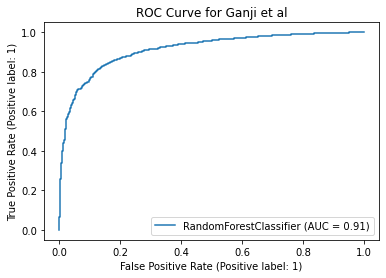

In [46]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


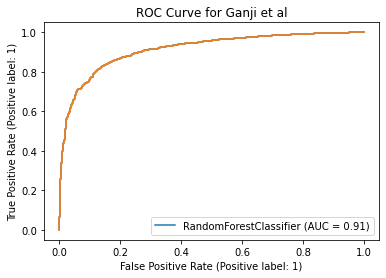

In [47]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_perez_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [241]:
!pip install shap

In [242]:
import shap


In [243]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [244]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[3991, 4378, 3910, 8142, 4635, 4780, 6472, 2610, 6965, 6878, 4977, 3854, 7597, 5175, 4294, 1012, 505, 3980, 9778, 9504, 737, 1363, 3189, 1775, 5585, 1321, 4121, 232, 1924, 7402, 6263, 8092, 2495, 3543, 4993, 2939, 4785, 77, 5234, 6919]


In [245]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [246]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [247]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [248]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

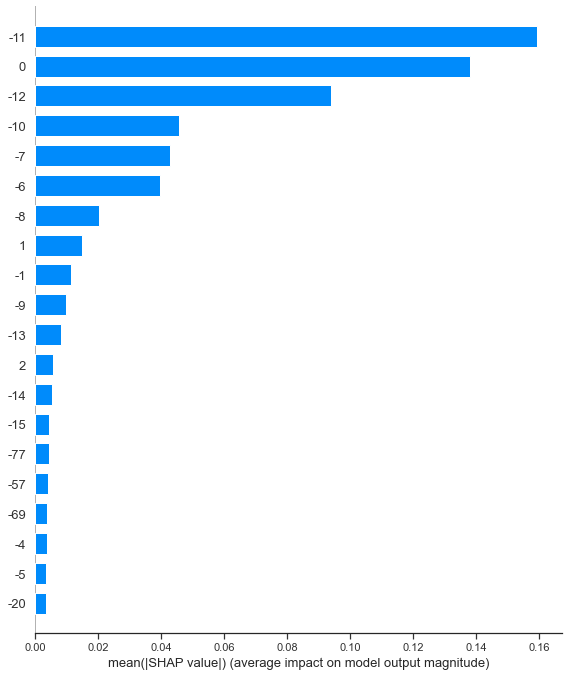

In [249]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

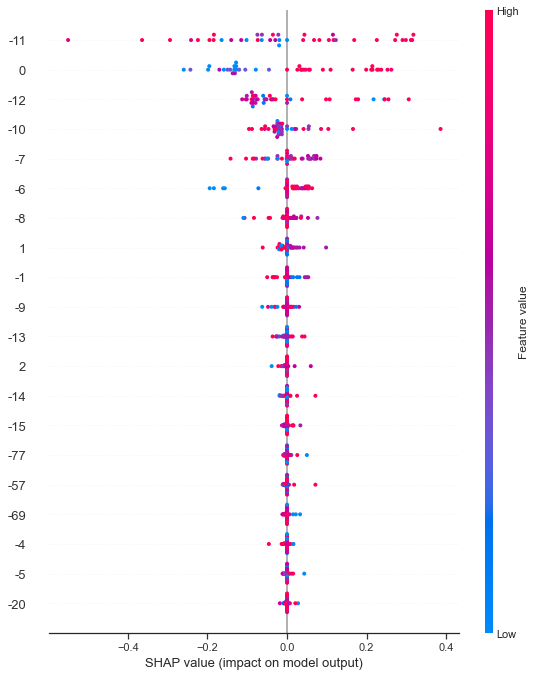

In [250]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

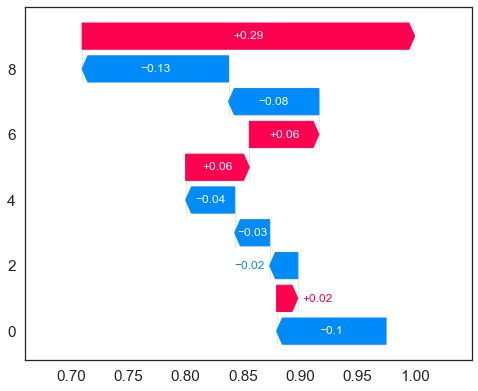

In [253]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [254]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [255]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [48]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [49]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



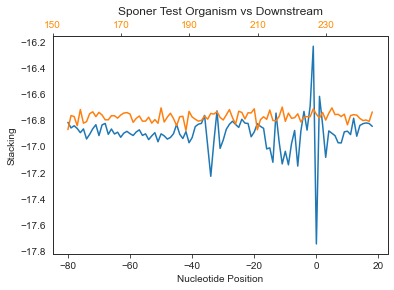

In [50]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [51]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [52]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [53]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8867965367965368


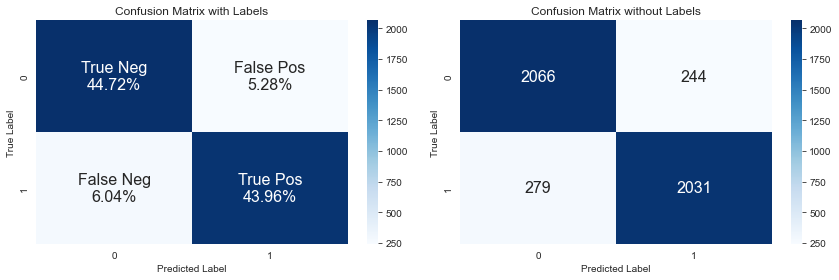

In [54]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [56]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8896103896103896, Precision: 0.8879310344827587, Recall: 0.8917748917748918, F1 Score: 0.8898488120950324, MCC: 0.7792280807306039, Specificity: 0.8874458874458875
Fold 2/10
 Accuracy: 0.8831168831168831, Precision: 0.8831168831168831, Recall: 0.8831168831168831, F1 Score: 0.8831168831168831, MCC: 0.7662337662337663, Specificity: 0.8831168831168831
Fold 3/10
 Accuracy: 0.854978354978355, Precision: 0.8660714285714286, Recall: 0.8398268398268398, F1 Score: 0.8527472527472528, MCC: 0.7102829018921181, Specificity: 0.8701298701298701
Fold 4/10
 Accuracy: 0.8852813852813853, Precision: 0.9009009009009009, Recall: 0.8658008658008658, F1 Score: 0.8830022075055187, MCC: 0.7711482799498872, Specificity: 0.9047619047619048
Fold 5/10
 Accuracy: 0.9134199134199135, Precision: 0.9282511210762332, Recall: 0.8961038961038961, F1 Score: 0.9118942731277533, MCC: 0.8273361199923651, Specificity: 0.9307359307359307
Fold 6/10
 Accuracy: 0.9025974025974026, Precision: 0.911504424778

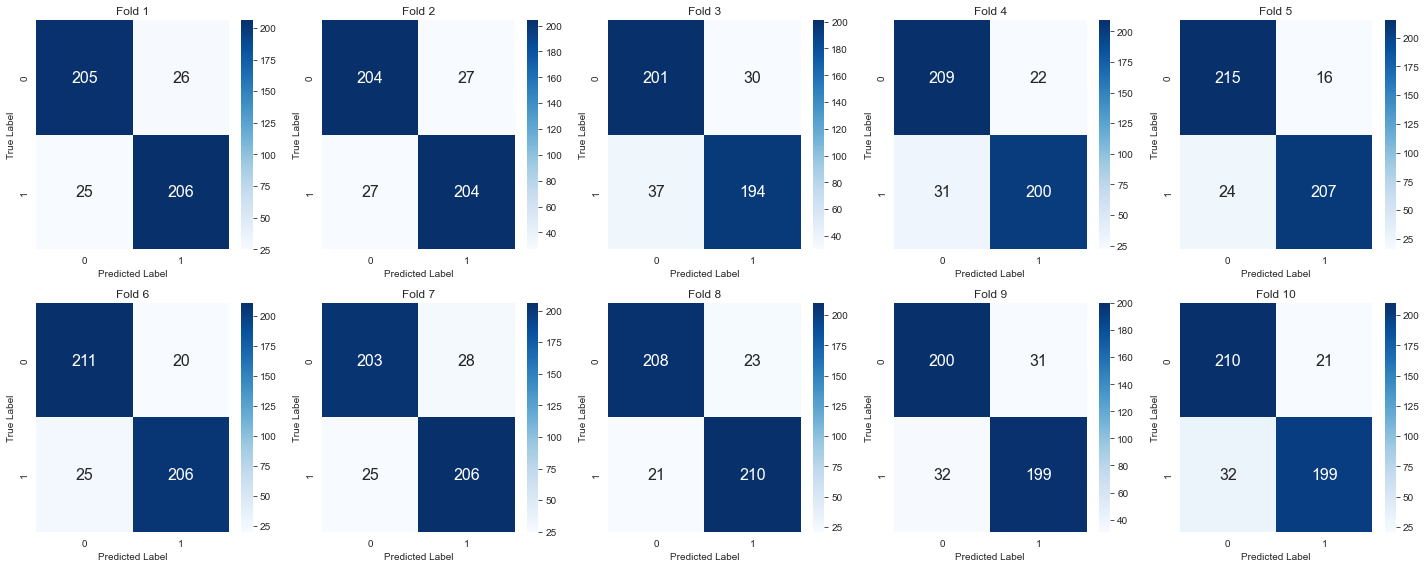

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [58]:
test_accuracy

[0.8896103896103896,
 0.8831168831168831,
 0.854978354978355,
 0.8852813852813853,
 0.9134199134199135,
 0.9025974025974026,
 0.8852813852813853,
 0.9047619047619048,
 0.8636363636363636,
 0.8852813852813853]

In [59]:
test_precision

[0.8879310344827587,
 0.8831168831168831,
 0.8660714285714286,
 0.9009009009009009,
 0.9282511210762332,
 0.911504424778761,
 0.8803418803418803,
 0.9012875536480687,
 0.8652173913043478,
 0.9045454545454545]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [60]:
test_recall

[0.8917748917748918,
 0.8831168831168831,
 0.8398268398268398,
 0.8658008658008658,
 0.8961038961038961,
 0.8917748917748918,
 0.8917748917748918,
 0.9090909090909091,
 0.8614718614718615,
 0.8614718614718615]

In [61]:
test_specificity

[0.8874458874458875,
 0.8831168831168831,
 0.8701298701298701,
 0.9047619047619048,
 0.9307359307359307,
 0.9134199134199135,
 0.8787878787878788,
 0.9004329004329005,
 0.8658008658008658,
 0.9090909090909091]

In [62]:
test_f1_score

[0.8898488120950324,
 0.8831168831168831,
 0.8527472527472528,
 0.8830022075055187,
 0.9118942731277533,
 0.9015317286652078,
 0.886021505376344,
 0.9051724137931034,
 0.8633405639913232,
 0.8824833702882484]

In [63]:
test_mcc

[0.7792280807306039,
 0.7662337662337663,
 0.7102829018921181,
 0.7711482799498872,
 0.8273361199923651,
 0.8053834911839244,
 0.7706277613080945,
 0.8095541526329894,
 0.7272795420152303,
 0.7714379131168883]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [64]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-17.0,-15.8,-14.9,-14.7,-16.7,-17.5,-14.7,-15.8,-17.5,-17.5,...,-14.9,-19.5,-17.5,-17.5,-17.5,-15.8,-14.7,-17.5,-15.8,1
1,-14.7,-17.5,-15.8,-14.7,-19.2,-14.7,-16.7,-17.0,-17.5,-15.8,...,-17.5,-15.8,-14.7,-19.5,-16.7,-14.7,-14.9,-19.5,-17.5,1
2,-17.5,-14.7,-19.5,-16.7,-19.5,-14.7,-16.7,-17.0,-16.7,-17.0,...,-15.8,-14.7,-15.8,-14.7,-19.2,-18.1,-17.0,-17.5,-17.5,1
3,-14.7,-15.8,-17.0,-15.8,-14.7,-17.5,-15.8,-14.7,-15.8,-19.5,...,-19.5,-14.9,-14.7,-15.8,-14.7,-17.5,-17.5,-16.7,-19.5,1
4,-15.8,-14.9,-18.1,-17.0,-17.5,-17.5,-16.7,-17.0,-18.1,-14.9,...,-19.5,-15.8,-14.9,-14.7,-14.9,-14.9,-15.8,-14.7,-15.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-19.2,-18.1,-17.5,-17.5,-14.7,-14.9,-14.9,-14.9,-15.8,-17.5,...,-17.5,-14.7,-19.5,-16.7,-14.7,-19.2,-18.1,-14.7,-14.9,0
12164,-17.5,-14.7,-15.8,-17.5,-14.7,-19.2,-14.9,-18.1,-19.5,-14.7,...,-18.1,-14.9,-19.2,-14.9,-14.7,-15.8,-14.7,-19.2,-14.7,0
12165,-15.8,-19.5,-14.7,-16.7,-19.5,-14.9,-14.9,-14.9,-14.7,-15.8,...,-18.1,-15.8,-17.0,-17.5,-18.1,-19.5,-15.8,-14.7,-14.9,0
12166,-17.5,-15.8,-14.7,-16.7,-17.5,-19.5,-14.7,-19.2,-14.9,-14.9,...,-14.9,-14.9,-14.7,-18.1,-15.8,-17.5,-17.5,-17.0,-15.8,0


In [65]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [66]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.7978635990139687, Precision: 0.8258527827648114, Recall: 0.7553366174055829, F1 Score: 0.7890222984562607, MCC: 0.5979423135184503, Specificity: 0.9090909090909091
Fold 2/10
 Accuracy: 0.8044371405094495, Precision: 0.8170940170940171, Recall: 0.7848932676518884, F1 Score: 0.8006700167504187, MCC: 0.6093608112753061, Specificity: 0.8404605263157895
Fold 3/10
 Accuracy: 0.8069022185702547, Precision: 0.8169491525423729, Recall: 0.7914614121510674, F1 Score: 0.8040033361134279, MCC: 0.6141135102579873, Specificity: 0.8240131578947368
Fold 4/10
 Accuracy: 0.8184059161873459, Precision: 0.8265993265993266, Recall: 0.80623973727422, F1 Score: 0.8162926018287614, MCC: 0.6370125091819209, Specificity: 0.8223684210526315
Fold 5/10
 Accuracy: 0.8126540673788003, Precision: 0.8321678321678322, Recall: 0.7828947368421053, F1 Score: 0.8067796610169493, MCC: 0.6263869522055397, Specificity: 0.8305921052631579
Fold 6/10
 Accuracy: 0.8266228430566968, Precision: 0.8291873963515

In [67]:
antisense_accuracy

[0.7978635990139687,
 0.8044371405094495,
 0.8069022185702547,
 0.8184059161873459,
 0.8126540673788003,
 0.8266228430566968,
 0.8159408381265407,
 0.8101889893179951,
 0.8042763157894737,
 0.8042763157894737]

In [68]:
antisense_precision

[0.8258527827648114,
 0.8170940170940171,
 0.8169491525423729,
 0.8265993265993266,
 0.8321678321678322,
 0.8291873963515755,
 0.8221476510067114,
 0.8211243611584327,
 0.814625850340136,
 0.8234265734265734]

In [69]:
antisense_recall

[0.7553366174055829,
 0.7848932676518884,
 0.7914614121510674,
 0.80623973727422,
 0.7828947368421053,
 0.8223684210526315,
 0.805921052631579,
 0.7927631578947368,
 0.787828947368421,
 0.774671052631579]

In [70]:
antisense_specificity

[0.9090909090909091,
 0.8404605263157895,
 0.8240131578947368,
 0.8223684210526315,
 0.8305921052631579,
 0.8423645320197044,
 0.8308702791461412,
 0.825944170771757,
 0.8275862068965517,
 0.8207236842105263]

In [71]:
antisense_f1_score

[0.7890222984562607,
 0.8006700167504187,
 0.8040033361134279,
 0.8162926018287614,
 0.8067796610169493,
 0.8257638315441783,
 0.813953488372093,
 0.8066945606694561,
 0.8010033444816053,
 0.7983050847457627]

In [72]:
antisense_mcc

[0.5979423135184503,
 0.6093608112753061,
 0.6141135102579873,
 0.6370125091819209,
 0.6263869522055397,
 0.6532651650029305,
 0.6319983716465651,
 0.6207367420259804,
 0.608882145378978,
 0.6096222029543236]

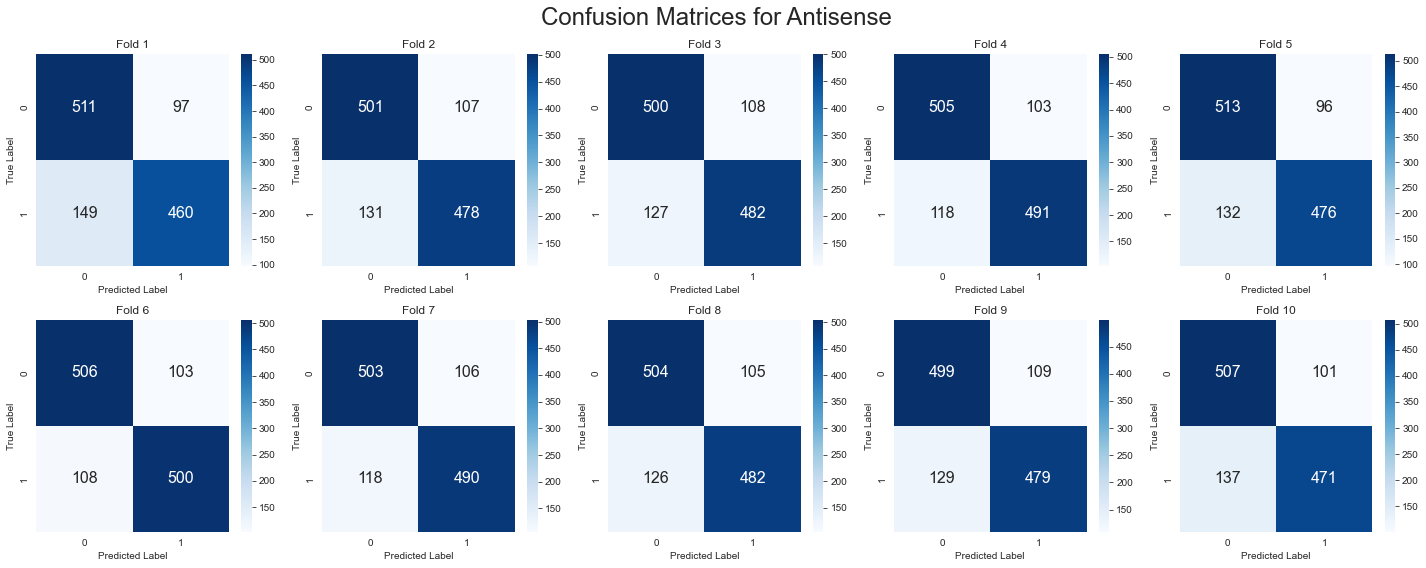

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [74]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-14.7,-19.2,-18.1,-17.0,-18.1,-19.2,-14.9,-14.9,-14.7,...,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,-14.7,-19.5,1
1,-16.7,-14.7,-19.5,-17.5,-17.5,-16.7,-17.5,-17.5,-17.0,-18.1,...,-19.5,-15.8,-14.7,-15.8,-17.5,-17.0,-16.7,-19.5,-14.7,1
2,-14.9,-14.9,-14.7,-14.9,-19.5,-16.7,-19.5,-14.7,-19.5,-15.8,...,-15.8,-14.7,-19.5,-17.5,-16.7,-17.5,-19.5,-14.7,-15.8,1
3,-18.1,-19.5,-17.5,-18.1,-15.8,-19.5,-14.7,-16.7,-17.5,-17.0,...,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-17.5,-16.7,-14.7,1
4,-15.8,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,-17.5,-16.7,-14.7,...,-18.1,-19.5,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-14.9,-14.7,-14.9,-14.9,-19.5,-18.1,-19.2,-14.9,-14.7,-19.2,...,-19.5,-17.5,-18.1,-15.8,-14.7,-14.9,-14.9,-19.2,-14.9,0
12126,-14.9,-19.2,-14.7,-18.1,-19.2,-14.7,-19.5,-17.5,-15.8,-14.7,...,-14.9,-14.7,-19.2,-14.7,-17.5,-18.1,-14.9,-19.2,-14.7,0
12127,-17.5,-15.8,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.2,-14.7,...,-19.5,-18.1,-19.2,-14.7,-14.9,-19.5,-18.1,-14.9,-19.5,0
12128,-14.7,-14.9,-19.2,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.5,...,-14.7,-19.2,-14.9,-14.7,-16.7,-14.7,-19.2,-14.9,-14.7,0


In [75]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [76]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8128606760098929, Precision: 0.8321678321678322, Recall: 0.7841845140032949, F1 Score: 0.8074639525021204, MCC: 0.6267833422977553, Specificity: 0.8338815789473685
Fold 2/10
 Accuracy: 0.8153338829348722, Precision: 0.8462929475587704, Recall: 0.771004942339374, F1 Score: 0.8068965517241381, MCC: 0.6332090723651416, Specificity: 0.8415841584158416
Fold 3/10
 Accuracy: 0.8120362737015664, Precision: 0.8426763110307414, Recall: 0.7677100494233937, F1 Score: 0.8034482758620689, MCC: 0.6265880416058399, Specificity: 0.8597359735973598
Fold 4/10
 Accuracy: 0.8194558944765046, Precision: 0.8403508771929824, Recall: 0.7891268533772653, F1 Score: 0.8139337298215804, MCC: 0.6401218670075636, Specificity: 0.8564356435643564
Fold 5/10
 Accuracy: 0.7889530090684254, Precision: 0.8084358523725835, Recall: 0.7578253706754531, F1 Score: 0.782312925170068, MCC: 0.5790651217731018, Specificity: 0.8498349834983498
Fold 6/10
 Accuracy: 0.8194558944765046, Precision: 0.8330464716006

In [77]:
internal_accuracy

[0.8128606760098929,
 0.8153338829348722,
 0.8120362737015664,
 0.8194558944765046,
 0.7889530090684254,
 0.8194558944765046,
 0.8112118713932399,
 0.7922506183017313,
 0.8062654575432812,
 0.8318219291014015]

In [78]:
internal_precision

[0.8321678321678322,
 0.8462929475587704,
 0.8426763110307414,
 0.8403508771929824,
 0.8084358523725835,
 0.8330464716006885,
 0.8348134991119005,
 0.8138297872340425,
 0.8342342342342343,
 0.8628158844765343]

In [79]:
internal_recall

[0.7841845140032949,
 0.771004942339374,
 0.7677100494233937,
 0.7891268533772653,
 0.7578253706754531,
 0.7986798679867987,
 0.7755775577557755,
 0.7574257425742574,
 0.764026402640264,
 0.7887788778877888]

In [80]:
internal_specificity

[0.8338815789473685,
 0.8415841584158416,
 0.8597359735973598,
 0.8564356435643564,
 0.8498349834983498,
 0.8201320132013201,
 0.8401976935749588,
 0.8467874794069192,
 0.8270181219110379,
 0.8484349258649094]

In [81]:
internal_f1_score

[0.8074639525021204,
 0.8068965517241381,
 0.8034482758620689,
 0.8139337298215804,
 0.782312925170068,
 0.8155012636899748,
 0.8041060735671515,
 0.7846153846153846,
 0.7975882859603789,
 0.8241379310344829]

In [82]:
internal_mcc

[0.6267833422977553,
 0.6332090723651416,
 0.6265880416058399,
 0.6401218670075636,
 0.5790651217731018,
 0.6394427792142395,
 0.6239718094039268,
 0.5858838961634242,
 0.6146811446167553,
 0.6660728630384477]

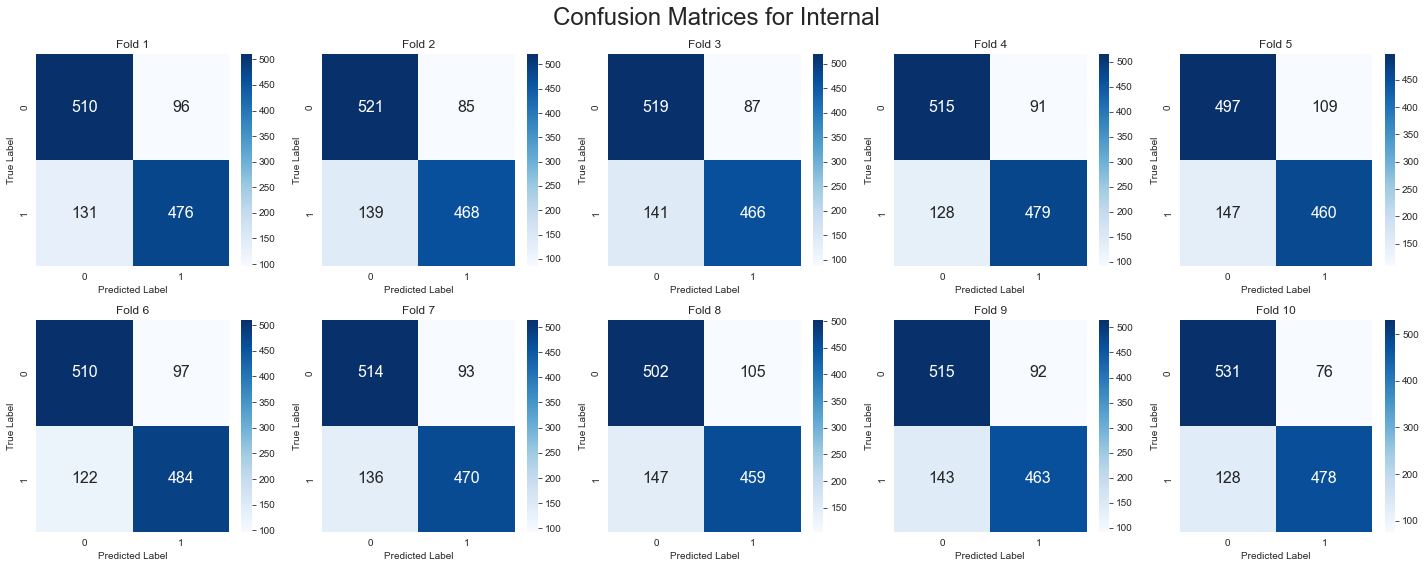

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
